In [14]:
import torch
import numpy as np

In [56]:
X = torch.tensor(np.loadtxt('raw_data//totalData_nowindchill.csv', delimiter=',', skiprows=1)[:, :-3],
                 dtype=torch.float).unsqueeze(1)
y = torch.tensor(np.loadtxt('raw_data//totalData_nowindchill.csv', delimiter=',', skiprows=1)[:, -1:],
                 dtype=torch.float).unsqueeze(1)

X = y[:-1]
y = torch.roll(y,-1,0)[:-1]
X.shape,y.shape

(torch.Size([4016, 1, 1]), torch.Size([4016, 1, 1]))

In [1]:
class BikeModel(torch.nn.Module):
    def __init__(self,batch_first=True):
        super(BikeModel, self).__init__()
        self.rnn = torch.nn.GRU(input_size=1, hidden_size=50,num_layers=1,batch_first=True)
        self.linear = torch.nn.Linear(in_features=50,out_features=1)
    def forward(self, X):
        
        H, h_n = self.rnn(X)
        Z = self.linear(H)
        return Z

NameError: name 'torch' is not defined

In [82]:
# Hyperparameters
lr = 0.01
batch_size = 97 
num_epoch = 2000

# Initialize the Vanilla RNN 
# Your code here. Aim for 1 line
rnn = BikeModel()

# Initialize the Loss. Please, use torch.nn.BCEWithLogitsLoss
# Your code here. Aim for 1 line
loss = torch.nn.MSELoss()

# Initialize the Optimizer. Please, use torch.optim.Adam (with the lr specified above)
# Your code here. Aim for 1 line
optimizer = torch.optim.Adam(rnn.parameters(),lr=lr)

# Training Loop
for epoch in range(num_epoch):
  for i in range(0, X.shape[0], batch_size):

    # Read minibatches (for both X and y)
    # Your code here. Aim for 2 lines
    Xi = X[i:i+batch_size]
    yi = y[i:i+batch_size]
    
    # Run the RNN model
    # Your code here. Aim for 1 line
    output = rnn.forward(Xi)

#     print('output',output.shape,'yi',yi.shape)
    # Compute the loss (use l as a variable for the loss)
    # Your code here. Aim for 1 line
    l = loss(output,yi)

    # Update the parameters (zero_grad, backward, optimization step)
    # Your code here. Aim for 3 lines
    rnn.zero_grad()
    l.backward()
    optimizer.step()


  # Print loss
  if (epoch + 1) % 100 == 0:
      print("Epoch %03d: Train_loss: %.4f " %(epoch+1, l.item()))


Epoch 100: Train_loss: 1038757.2500 
Epoch 200: Train_loss: 552544.3750 
Epoch 300: Train_loss: 323082.2188 
Epoch 400: Train_loss: 348939.3438 
Epoch 500: Train_loss: 362955.9688 
Epoch 600: Train_loss: 342151.0000 
Epoch 700: Train_loss: 330276.3125 
Epoch 800: Train_loss: 343047.9062 
Epoch 900: Train_loss: 331325.4062 
Epoch 1000: Train_loss: 342180.7188 
Epoch 1100: Train_loss: 361523.0625 
Epoch 1200: Train_loss: 383844.4375 
Epoch 1300: Train_loss: 335892.9062 
Epoch 1400: Train_loss: 372249.0312 
Epoch 1500: Train_loss: 319553.5625 
Epoch 1600: Train_loss: 330093.7812 
Epoch 1700: Train_loss: 299378.9688 
Epoch 1800: Train_loss: 314073.9688 
Epoch 1900: Train_loss: 293752.1250 
Epoch 2000: Train_loss: 284329.5000 


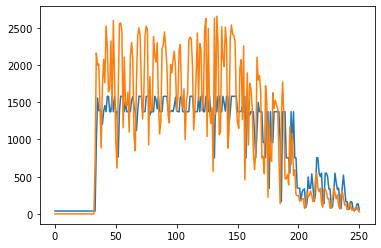

In [83]:
import matplotlib.pyplot as plt
plt.plot(output.detach().squeeze())
plt.plot(yi.squeeze())